In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Configuración para mostrar imágenes en Jupyter
plt.rcParams['figure.figsize'] = (15, 10)

# Función auxiliar para mostrar imágenes
def mostrar_imagenes(imagenes, titulos, cmap='gray'):
    """
    Muestra múltiples imágenes en una cuadrícula
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

    if n == 1:
        axes = [axes]

    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(titulo, fontsize=12)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

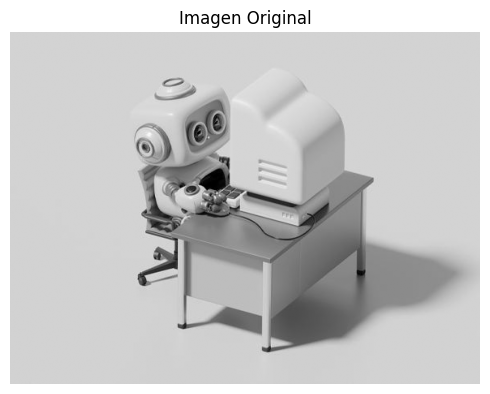

In [35]:
# --- Cargar imagen ---
# Cambia la ruta si usas tu propia imagen
img = cv2.imread('imagen de prueba 2.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta o el nombre del archivo.")

mostrar_imagenes([img], ['Imagen Original'])

# FILTRO DE MEDIA

El **filtro de media** o de **promedio** suaviza la imagen reemplazando cada píxel por el promedio de sus vecinos.
Se usa principalmente para **reducir el ruido**.

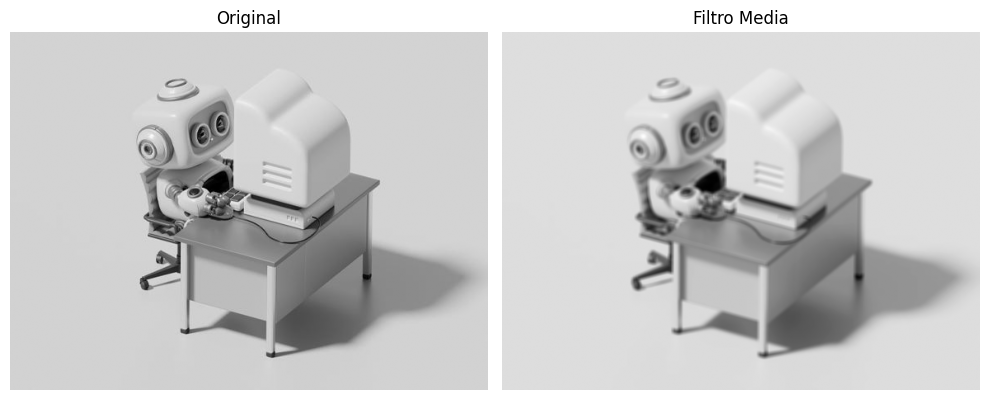

In [36]:
blur = cv2.blur(img, (5,5)) # kernel 5x5
mostrar_imagenes([img, blur], ['Original','Filtro Media'])

El filtro de media suaviza la imagen y elimina variaciones pequeñas,
aunque puede **desdibujar los bordes** si se usa un kernel grande.

# FILTRO DE MEDIANA

El **filtro de mediana** reemplaza cada píxel por el valor mediano de su vecindario.
Es muy eficaz para eliminar **ruido impulsivo (sal y pimienta)**.

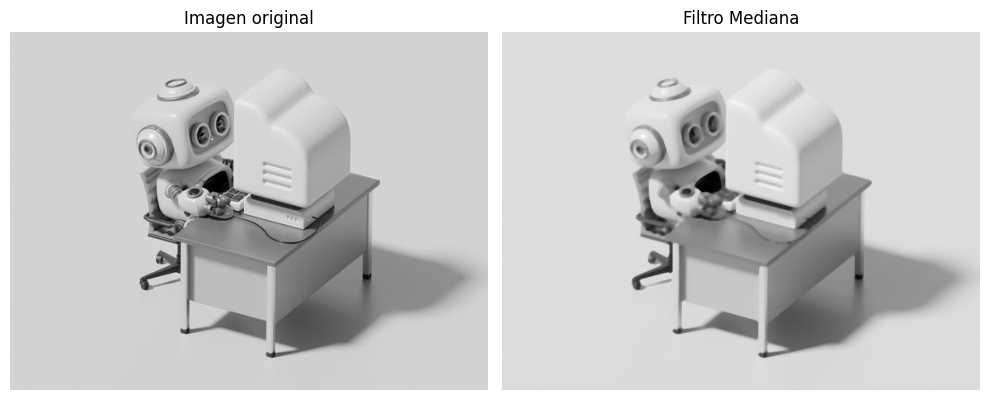

In [37]:
den = cv2.medianBlur(img, 5)
mostrar_imagenes([img, den], ['Imagen original', 'Filtro Mediana'])

A diferencia del filtro de media, este mantiene los bordes definidos
mientras elimina el ruido puntual.

# FILTRO LOGARITMICO

Realza los detalles en las zonas oscuras mediante una transformación no lineal

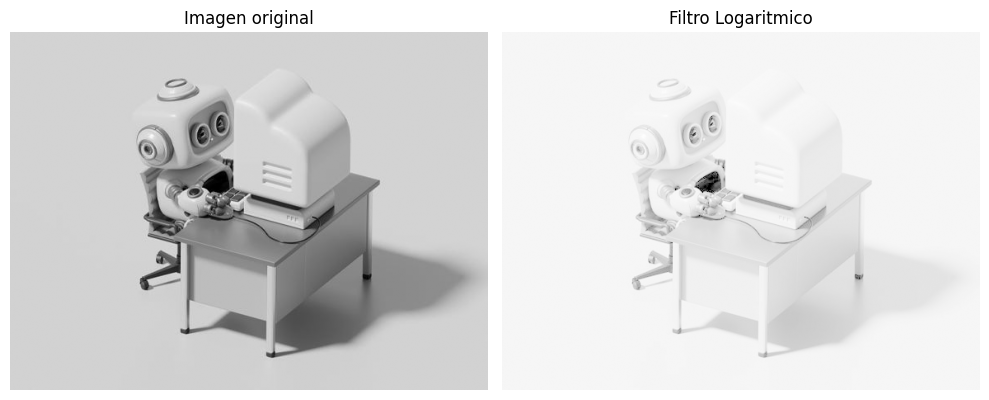

In [38]:
# Convertir a float para cálculos precisos
imagen_float = img.astype(np.float32)

c = 255 / np.log(1 + 255)
log_img = c * np.log(1 + imagen_float)
log_img = np.uint8(log_img)
mostrar_imagenes([imagen_float, log_img], ['Imagen original', 'Filtro Logaritmico'])

El filtro logarítmico **aclara zonas oscuras** y resalta detalles,
útil en imágenes con poca iluminación.

# FILTRO DE CUADRO NORMALIZADO

También llamado **filtro de promedio uniforme**, aplica un suavizado donde todos los pesos del kernel son iguales.

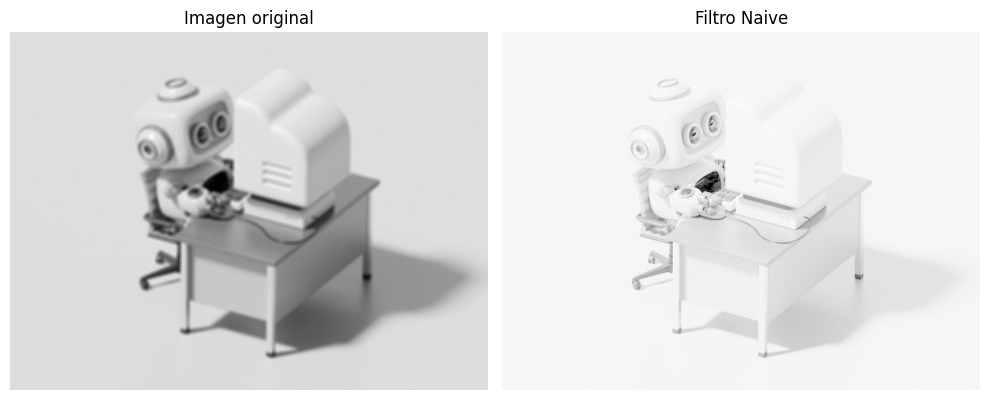

In [39]:
nb = cv2.boxFilter(img, -1, (5,5), normalize=True)
mostrar_imagenes([nb, log_img], ['Imagen original', 'Filtro Naive'])

Produce un efecto similar al filtro de media, pero con control directo sobre la normalización.
Ideal para reducir ruido uniforme.

# FILTRO GAUSSIANO

Usa una máscara ponderada por una distribución gaussiana,
dando más importancia a los píxeles del centro.

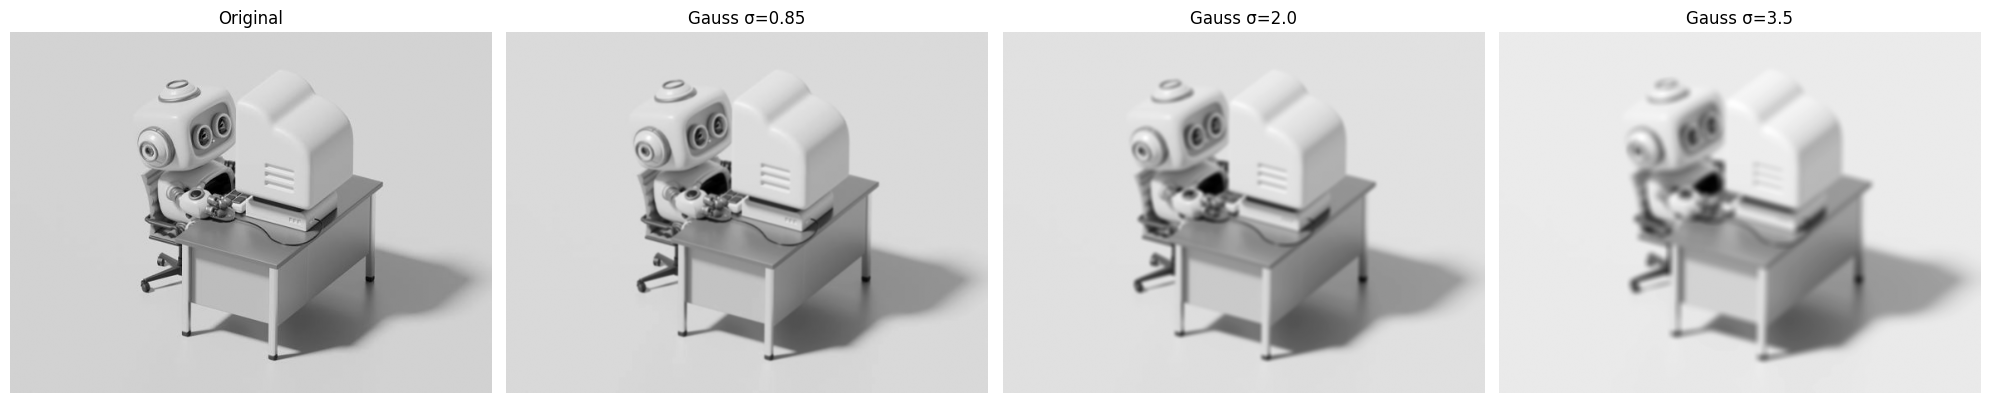

In [40]:
# Parámetros:
# - (5, 5): tamaño del kernel (debe ser impar)
# - sigmaX: desviación estándar en X (σ)

# Diferentes niveles de suavizado
gauss_suave = cv2.GaussianBlur(img, (5, 5), sigmaX=0.85)  # σ pequeño
gauss_medio = cv2.GaussianBlur(img, (7, 7), sigmaX=2.0)   # σ medio
gauss_fuerte = cv2.GaussianBlur(img, (11, 11), sigmaX=3.5) # σ grande

mostrar_imagenes(
    [img, gauss_suave, gauss_medio, gauss_fuerte],
    ['Original', 'Gauss σ=0.85', 'Gauss σ=2.0', 'Gauss σ=3.5']
)


El filtro gaussiano **reduce el ruido sin afectar tanto los bordes**,
siendo uno de los más usados en preprocesamiento.

# FILTRO LAPLACIANO

Resalta los bordes detectando cambios bruscos de intensidad.

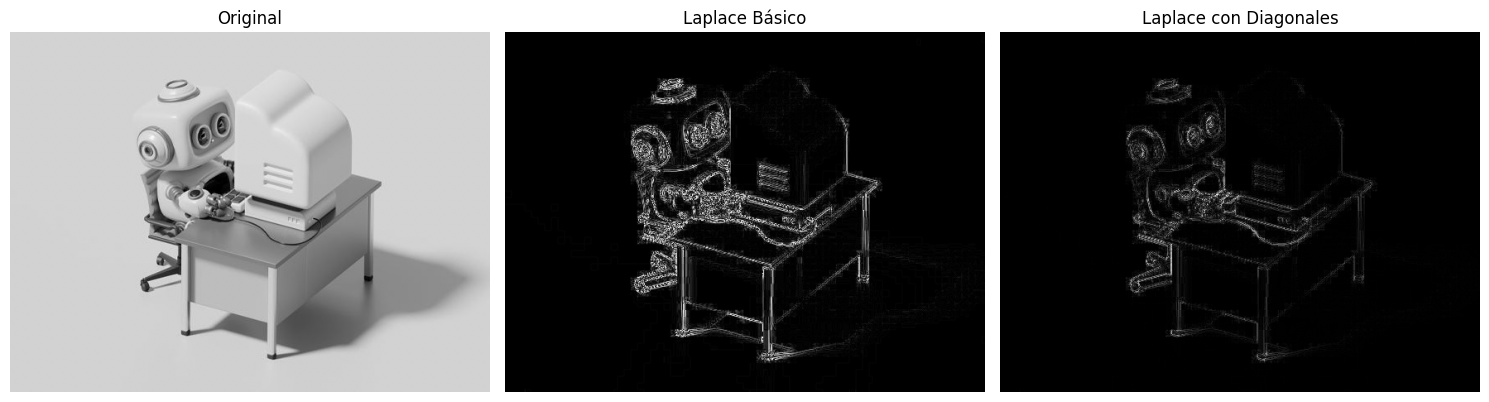

In [41]:
# Filtro Laplaciano
# - ksize: tamaño del kernel (1, 3, 5, 7, etc.)
# - ddepth: profundidad de la imagen de salida (CV_64F para evitar valores negativos)
laplace = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Convertir a uint8 para visualización
laplace = np.uint8(np.absolute(laplace))

laplace_diag = cv2.Laplacian(img, cv2.CV_64F, ksize=1)
laplace_diag = np.uint8(np.absolute(laplace_diag))

# Kernel básico usado por Laplacian (ksize=3):
"""([[0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])"""

# Kernel con diagonales (ksize=1):
"""([[1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])"""

mostrar_imagenes(
    [img, laplace, laplace_diag],
    ['Original', 'Laplace Básico', 'Laplace con Diagonales']
)

El filtro laplaciano **resalta bordes** y contornos,
pero puede amplificar el ruido si la imagen no fue suavizada previamente.

# FILTRO SOBEL

Calcula gradientes de intensidad para detectar bordes horizontales y verticales.

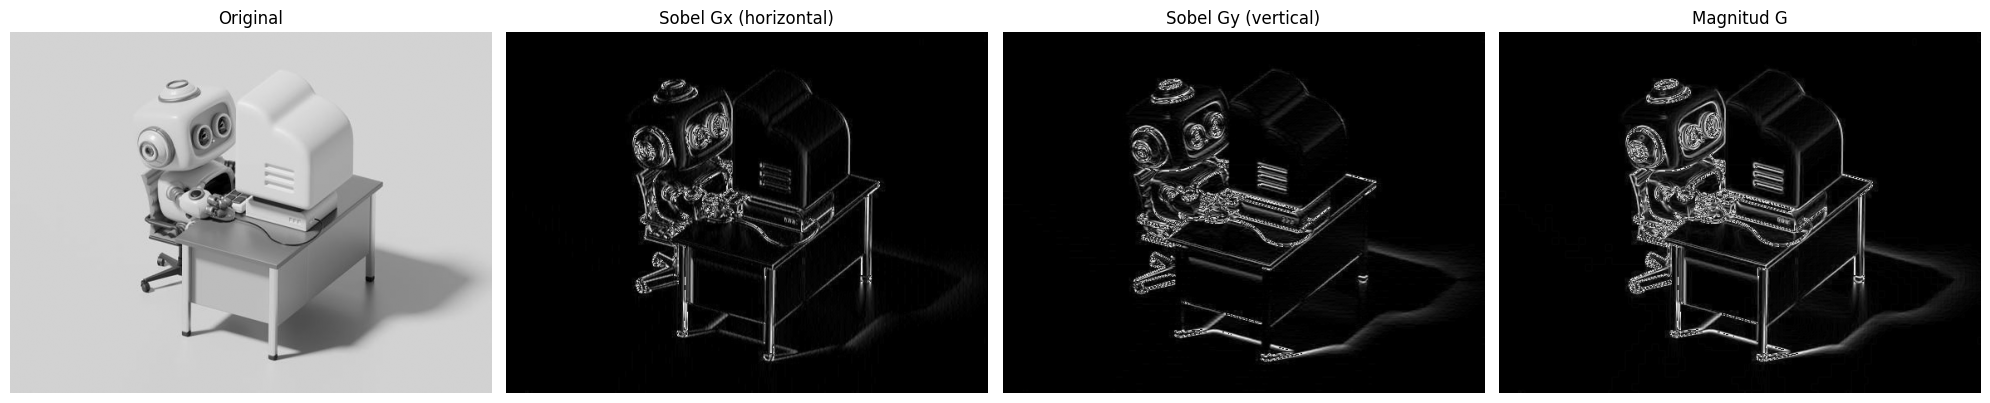

In [42]:
# Calcular gradientes en X e Y
# - dx=1, dy=0: gradiente en X
# - dx=0, dy=1: gradiente en Y
# - ksize: tamaño del kernel (1, 3, 5, 7, etc.)

sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=3)

# Convertir a valores absolutos
sobel_x_abs = np.uint8(np.absolute(sobel_x))
sobel_y_abs = np.uint8(np.absolute(sobel_y))

# Calcular magnitud del gradiente
magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
magnitud = np.uint8(magnitud)

# Calcular dirección del gradiente (en radianes)
direccion = np.arctan2(sobel_y, sobel_x)

mostrar_imagenes(
    [img, sobel_x_abs, sobel_y_abs, magnitud],
    ['Original', 'Sobel Gx (horizontal)', 'Sobel Gy (vertical)', 'Magnitud G']
)

El filtro Sobel detecta **bordes en ambas direcciones**,
útil en detección de contornos y análisis estructural.

# FILTRO CANNY

Es un detector de bordes avanzado que combina suavizado, gradiente y umbralización.

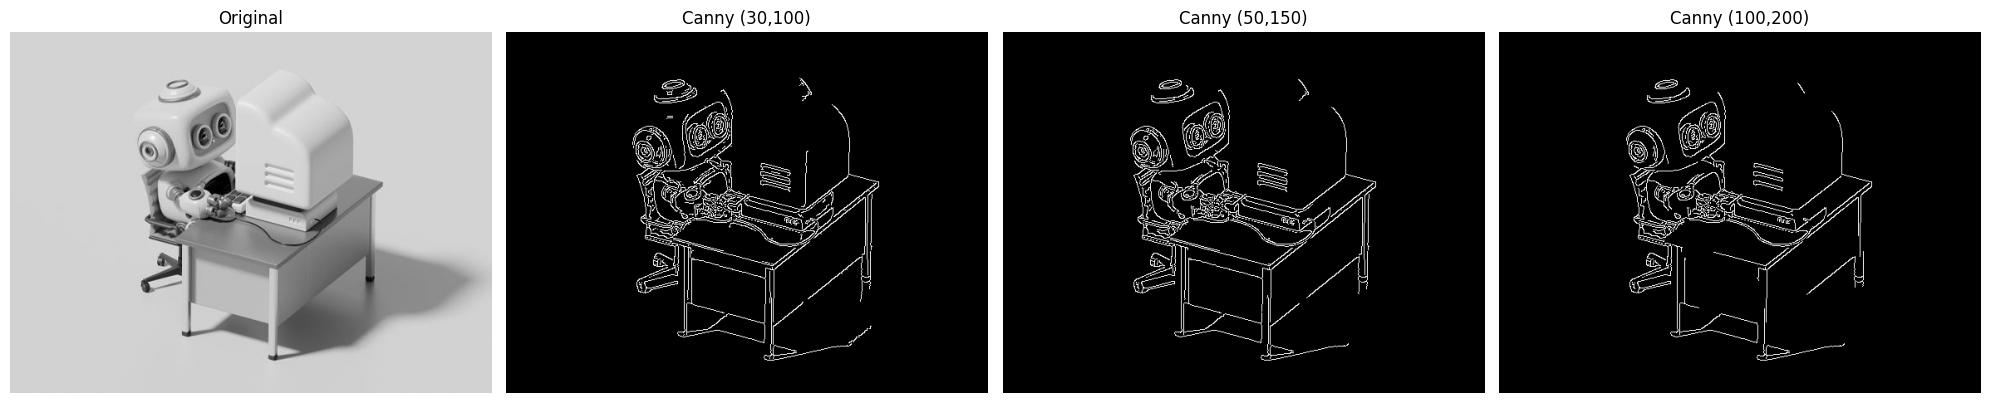

In [43]:
# Parámetros de Canny:
# - threshold1: umbral inferior (bordes débiles)
# - threshold2: umbral superior (bordes fuertes)
# - apertureSize: tamaño del kernel de Sobel (3, 5, 7)
# - L2gradient: si True, usa ecuación más precisa para gradiente

# Diferentes configuraciones de umbrales
canny_sensible = cv2.Canny(img, threshold1=30, threshold2=100, apertureSize=3)
canny_medio = cv2.Canny(img, threshold1=50, threshold2=150, apertureSize=3)
canny_estricto = cv2.Canny(img, threshold1=100, threshold2=200, apertureSize=3)

mostrar_imagenes(
    [img, canny_sensible, canny_medio, canny_estricto],
    ['Original', 'Canny (30,100)', 'Canny (50,150)', 'Canny (100,200)']
)

El filtro Canny es uno de los **más precisos para detección de bordes**,
ya que combina varios métodos en un solo proceso.